### Download dataset from Kaggle, fashion_mnist

todo: explain why we choose to use fashion_mnist

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

training_set = pd.read_csv('Dataset/fashion_data/fashion-mnist_train.csv')
test_set = pd.read_csv('Dataset/fashion_data/fashion-mnist_test.csv')

print(training_set.shape)
print(test_set.shape)

(60000, 785)
(10000, 785)


perform data cleaning

In [20]:
# X is pixels, y is labels
y_train = training_set.iloc[:, 0].to_numpy()
X_train = training_set.iloc[:, 1:].to_numpy()
y_test = test_set.iloc[:, 0].to_numpy()
X_test = test_set.iloc[:, 1:].to_numpy()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


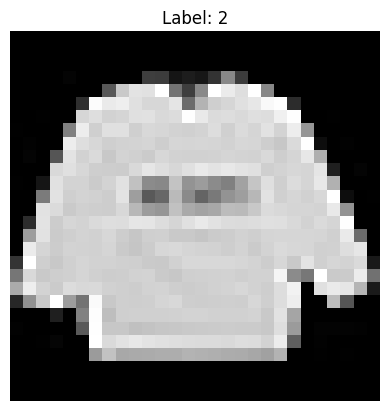

In [21]:
#visualising one image

# choosing the first image
image_array = X_train[0]
label = y_train[0]

# reshape 784 to 28x28
image_array = image_array.reshape(28, 28)

# plotting the image
plt.imshow(image_array, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [22]:
# rescaling the pixel values down to values between 0 - 1 for efficiency of neural network

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_train[:5])
print(X_test[:5])

(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.21960784 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [23]:
# one hot encoding for labels

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

print(y_train.shape)
print(y_train[:5])


(60000, 10)
       0      1      2      3      4      5      6      7      8      9
0  False  False   True  False  False  False  False  False  False  False
1  False  False  False  False  False  False  False  False  False   True
2  False  False  False  False  False  False   True  False  False  False
3   True  False  False  False  False  False  False  False  False  False
4  False  False  False   True  False  False  False  False  False  False


In [24]:
# for reproducibility
np.random.seed(42)

# architecture of the neural network
input_nodes = X_train.shape[1]     
hidden_nodes = 128             
output_nodes = 10

In [25]:
def init_param():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    print(w1.shape, b1.shape, w2.shape, b2.shape)
    
    return w1, b1, w2, b2

w1, b1, w2, b2 = init_param()

(784, 10) (10, 1) (10, 10) (10, 1)


In [26]:
# activation functions and its derivatives
def ReLU(x):
    t= x * (x > 0)
    return t

def ReLU_derivative(x):
    return (x >= 0) * 1

def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s

def sigmoid_derivative(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return ds
    
def softmax(x):
    np.exp(x)/sum(np.exp(x))

In [27]:
def forward_prop(X, w1, b1, w2, b2):
    print(X.T.shape)

    print("w")

    print(w1.shape)
    z1 = np.dot(X.T, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def neg_log_likelihood(y, y_hat):
    return -1/len(y) * np.sum(np.sum(y * np.log(y_hat)))

In [28]:
def back_prop(z1, a1, z2, a2, w2, X_train, y_train):
    
    dz2 = a2 - y_train
    
    dw2 = 1 / m * np.dot(dz2, a1.T)
    
    db2 = 1 / m * np.sum(dz2, 2)

    dz1 = np.dot(w2.T, dz2) * relu_derivative(z1)
    

    dw1 = 1 / m * np.dot(dz2, X_train.T)
    
    db1 = 1 / m * np.sum(dz1, 2)
    

    return dw1, db1, dw2, db2


In [29]:
def update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    
    W1, b1, W2, b2 = init_param()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            
    return W1, b1, W2, b2

In [30]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.10, 500)

(784, 10) (10, 1) (10, 10) (10, 1)
(10, 784)
w
(10, 1)


ValueError: shapes (10,784) and (10,1) not aligned: 784 (dim 1) != 10 (dim 0)